In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import importlib

import my_utils.pixel as pixel
importlib.reload(pixel) # get changes in my_utils.pixel

<module 'my_utils.pixel' from '/home/lukas/Documents/ETH/MASTER_THESIS/code/my_utils/pixel.py'>

### Load Data:

In [15]:
WW = True  # only consider 'Winter Wheat' otherwise consider Cereals

if WW:
    path_cov = os.path.join("data/yieldmapping_data", "WW_covariates_tot.csv")
    path_met = os.path.join("data/yieldmapping_data", "WW_meteo_tot.csv")
    path_yie = os.path.join("data/yieldmapping_data", "WW_yield_tot.csv")
else:
    path_cov = os.path.join("data/yieldmapping_data",
                            "Cereals_covariates_tot.csv")
    path_met = os.path.join("data/yieldmapping_data", "Cereals_meteo_tot.csv")
    path_yie = os.path.join("data/yieldmapping_data", "Cereals_yield_tot.csv")

d_cov = pd.read_csv(path_cov)
d_met = pd.read_csv(path_met)
d_yie = pd.read_csv(path_yie)

### smoothing splines for NDVI:

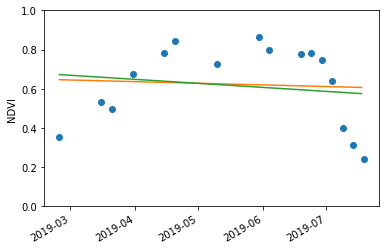

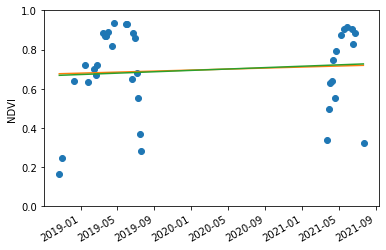

In [16]:
np.random.seed(1)
smooth = 0 #1e-11/(28*24*3600)

for i in range(2):
    temp = pixel.Pixel(d_cov, d_met, d_yie)
    temp.get_ndvi()
    temp.plot_ndvi()
    temp.get_smooting_spline(name="all", smooth=smooth)
    temp.get_smooting_spline(name="filter", smooth=smooth,
                             ind_keep=temp.filter("ndvi_min"))
    temp.plot_step_interpolate(which="all")
    temp.plot_step_interpolate(which="filter")
    plt.show()

# print(temp)

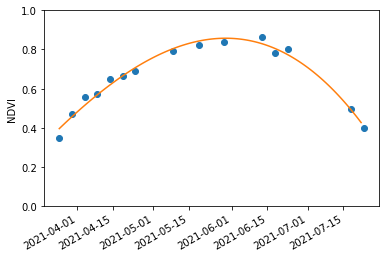

In [17]:
import scipy.interpolate as interpolate
self = pixel.Pixel(d_cov, d_met, d_yie)
self.get_b_spline()
self.plot_ndvi()
self.plot_step_interpolate("BSpline")

In [18]:
pixel.Pixel.__dict__
dir(pixel.Pixel)
dir(self)

['FID',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_init_step_interpolate',
 '_prepare_interpolation',
 'coord_id',
 'cov',
 'cov_date_np',
 'cov_n',
 'filter',
 'filter_method',
 'filter_ndvi_min',
 'get_b_spline',
 'get_cubic_spline',
 'get_ndvi',
 'get_smooting_spline',
 'get_unix_date_sequence',
 'met',
 'ndvi',
 'plot_ndvi',
 'plot_step_interpolate',
 'set_step',
 'step',
 'step_interpolate',
 'step_seq_np',
 'step_seq_pd',
 'yie']

# TO DO 
- beautiful plot (colors, legend, title)
- advanced plotting (support for lists)